# I. Import Libraries, Preferences, & Helper Functions

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preferences

In [2]:
# Set the style of the visualization
sns.set(style="whitegrid")

## Helper Functions

### Handling Outliers

In [3]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

# II. Data Import & Exploration

In [4]:
DATASETURL = "https://gitlab.com/aelluminate/databank/2024-10/ease-my-trip-flight-booking/-/raw/main/cleaned.csv"

In [5]:
data = pd.read_csv(DATASETURL)
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
print(f"Dataset has [{data.shape[0]}] rows and [{data.shape[1]}] columns\n")
print(f"Columns are\n{data.columns}")

Dataset has [300153] rows and [12] columns

Columns are
Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


# III. Data Preprocessing: General

## Rename Columns

### Airlines

In [9]:
# Check all categorical values on specific columns
print(data['airline'].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [10]:
# Create a dictionary to map the values
airlines_mapping = {
  'GO_FIRST': 'Go First',
  'Indigo': 'IndiGo',
  'Air_India': 'Air India'
}

# Replace the values in the column
data['airline'] = data['airline'].replace(airlines_mapping)
print(data['airline'].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'Go First' 'IndiGo' 'Air India']


### Departure Time

In [11]:
# Check all categorical values on specific columns
print(data['departure_time'].unique())

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


In [12]:
# Create a dictionary to map the values
departure_time_mapping = {
  'Early_Morning': 'Early Morning',
  'Late_Night': 'Late Night'
}

# Replace the values in the column
data['departure_time'] = data['departure_time'].replace(departure_time_mapping)
print(data['departure_time'].unique())

['Evening' 'Early Morning' 'Morning' 'Afternoon' 'Night' 'Late Night']


## Handle Missing Values

In [13]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Handle Duplicates

In [14]:
data.duplicated().sum()

np.int64(0)

# IV. Exploratory Data Analysis

## Price Distribution

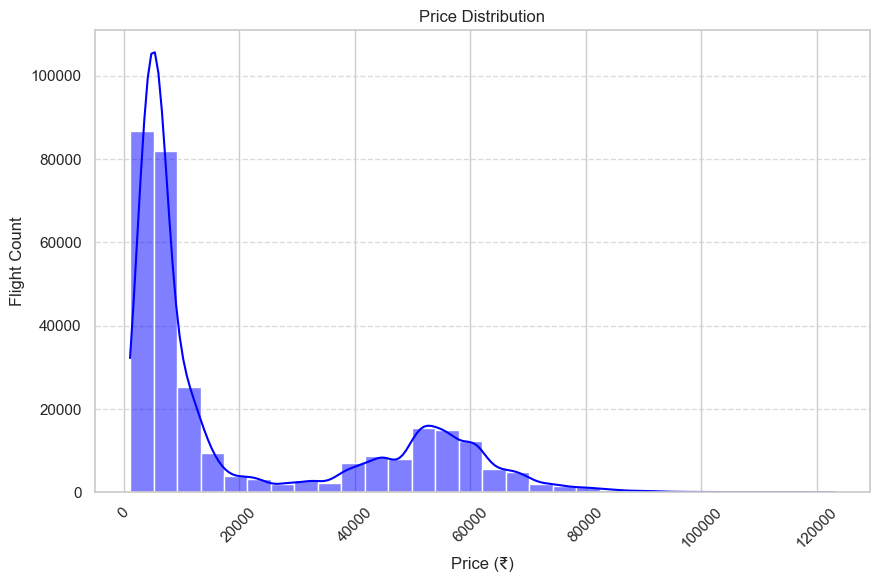

In [15]:
plt.figure(figsize=(10, 6))

# Create the plot
sns.histplot(data['price'], kde=True, color='blue', bins=30)

# Set the title and labels
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Price vs Class

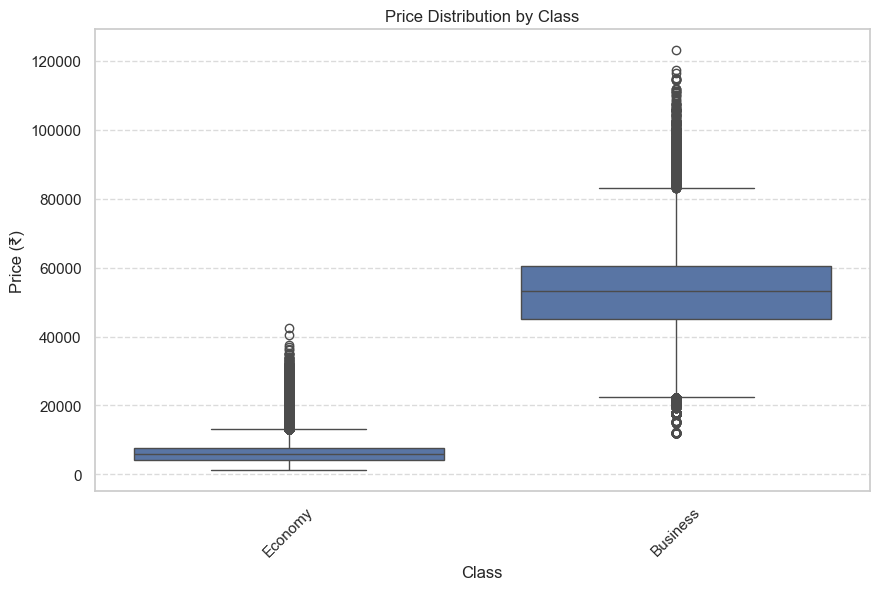

In [16]:
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='class', y='price', data=data)

# Set the title of the plot
plt.title('Price Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Price vs Duration

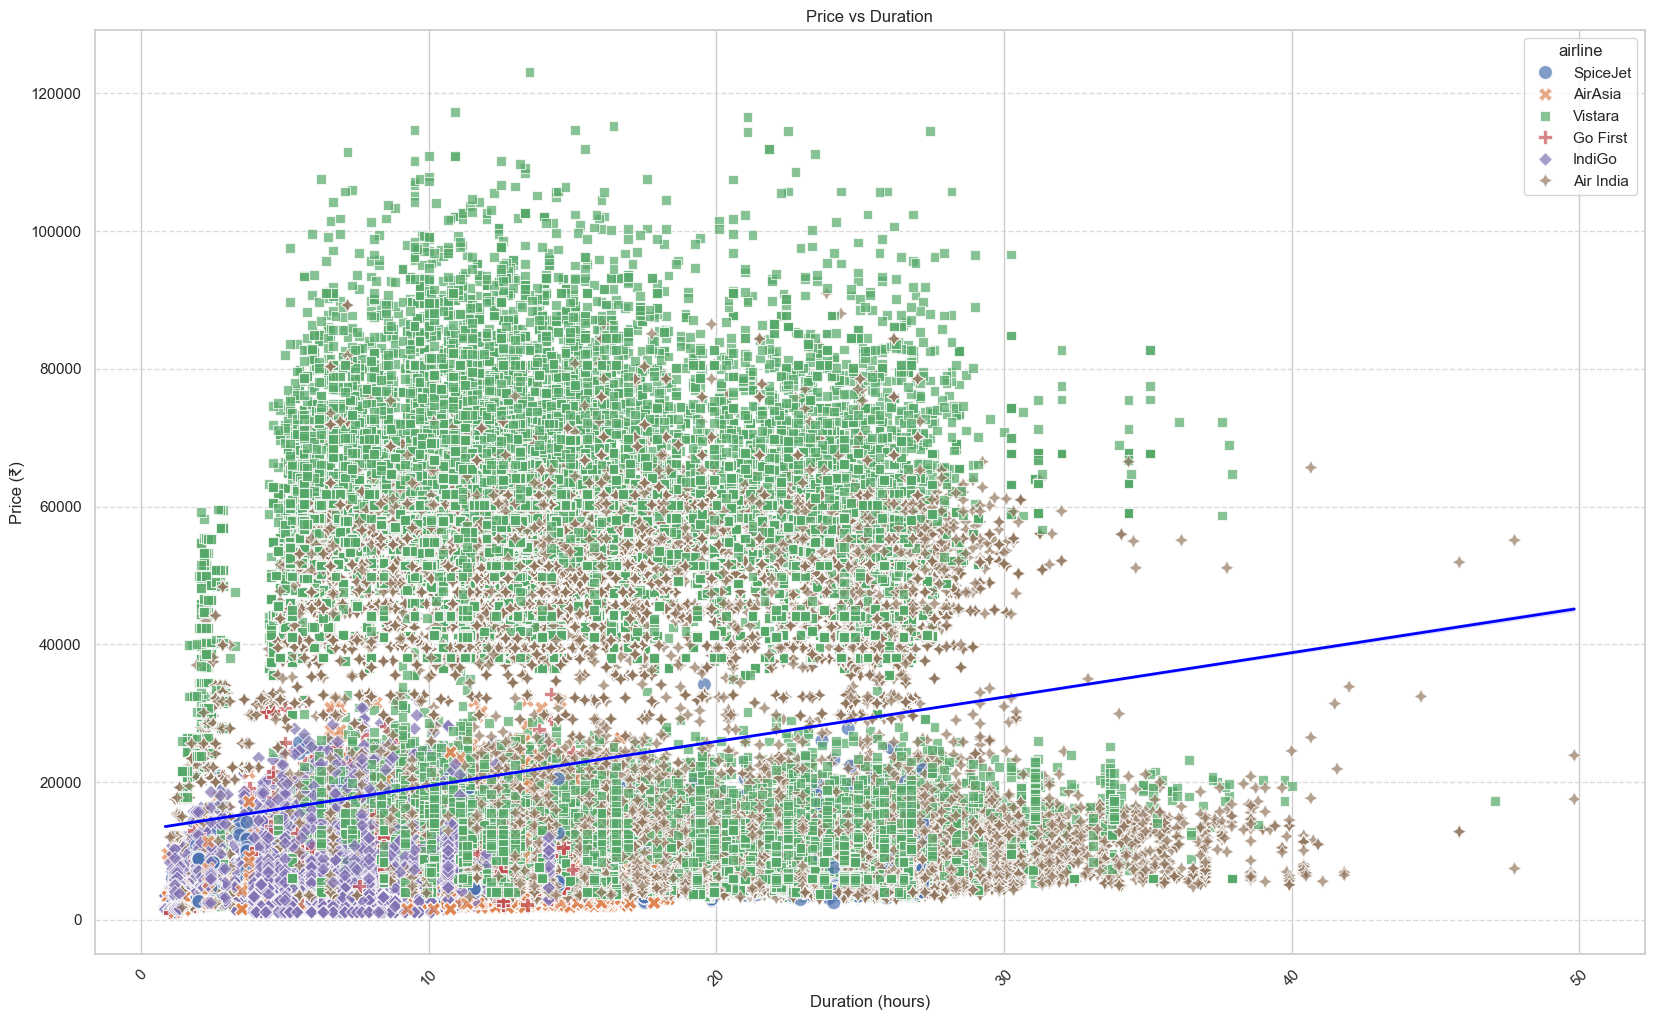

In [17]:
plt.figure(figsize=(20, 12))

# Create a scatter plot
sns.scatterplot(data=data, x='duration', y='price', hue='airline', style='airline', s=100, alpha=0.7)
sns.regplot(data=data, x='duration', y='price', scatter=False, color='blue', line_kws={"linewidth": 2})

# Set the title and labels
plt.title('Price vs Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Price Distribution by Airline

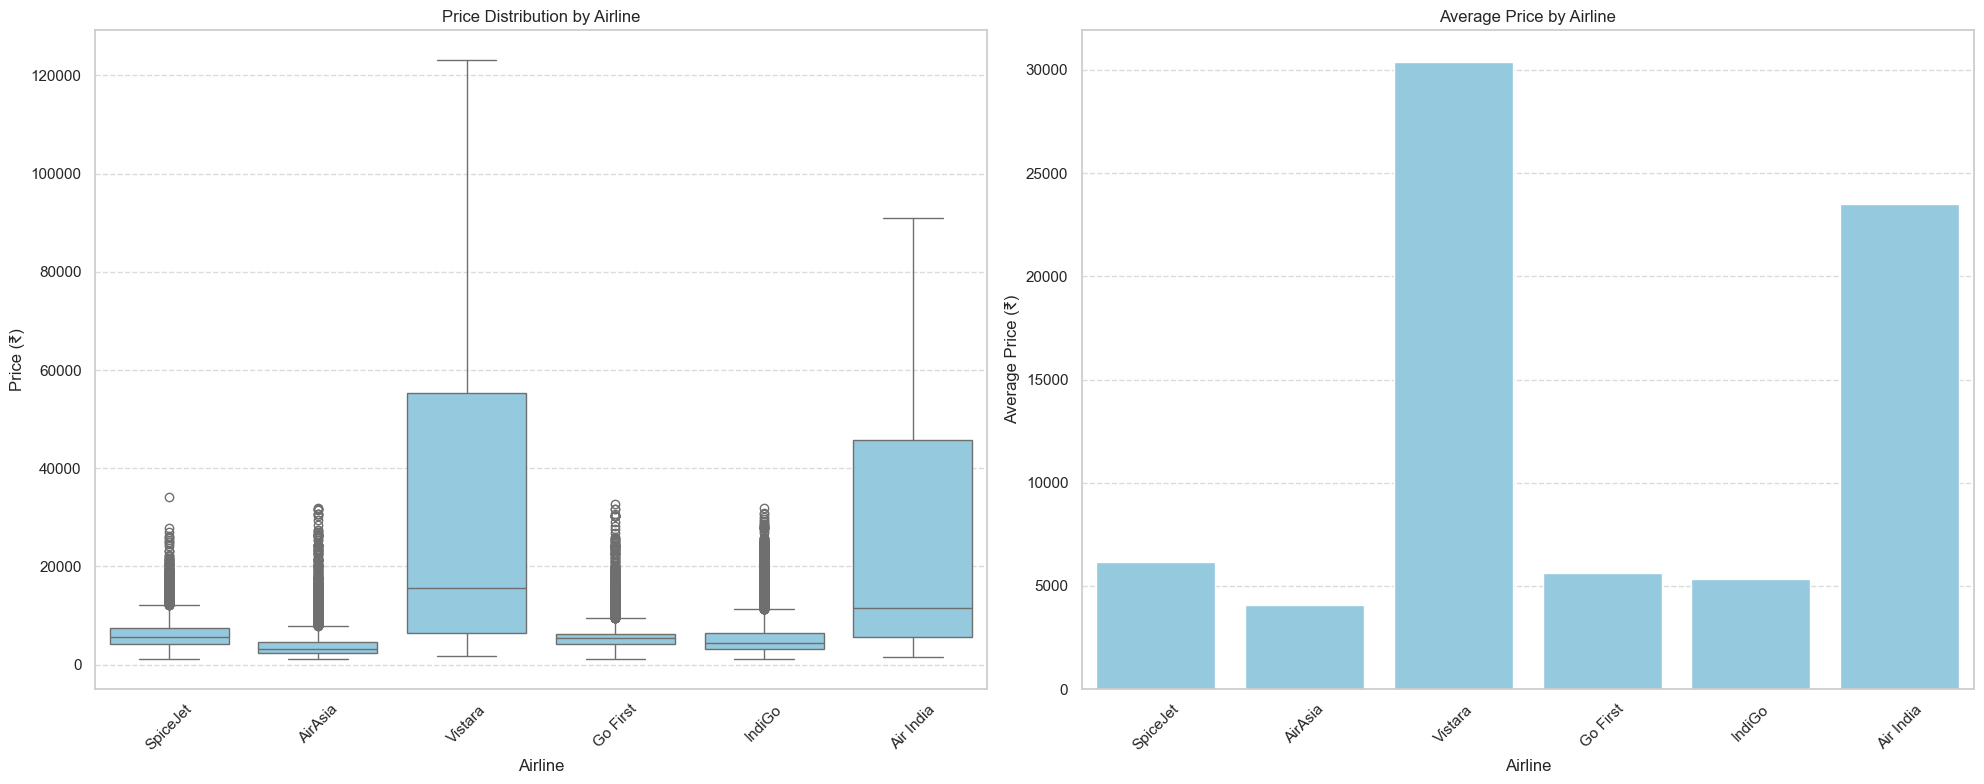

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Boxplot for price by airline
sns.boxplot(x='airline', y='price', data=data, ax=axes[0], color='skyblue')
axes[0].set_title('Price Distribution by Airline')
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Price (₹)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)


# Bar plot for average price by airline
sns.barplot(x='airline', y='price', data=data, ax=axes[1], errorbar=None, color='skyblue')
axes[1].set_title('Average Price by Airline')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Average Price (₹)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

## Departure Time Analysis

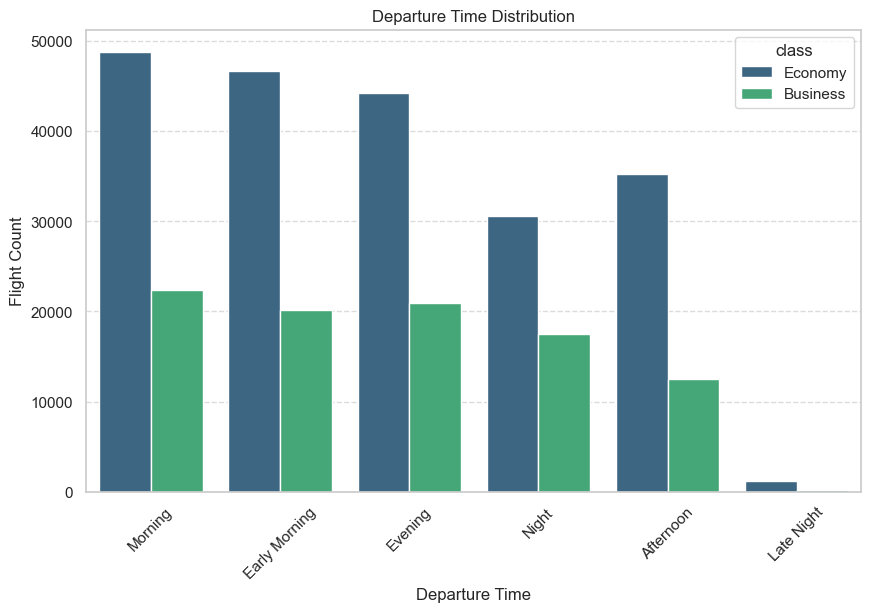

In [19]:
plt.figure(figsize=(10, 6))

# Plot for departure time
sns.countplot(data=data, x='departure_time', order=data['departure_time'].value_counts().index, palette='viridis', hue='class')

# Set the title and labels
plt.title('Departure Time Distribution')
plt.xlabel('Departure Time')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Stops Analysis

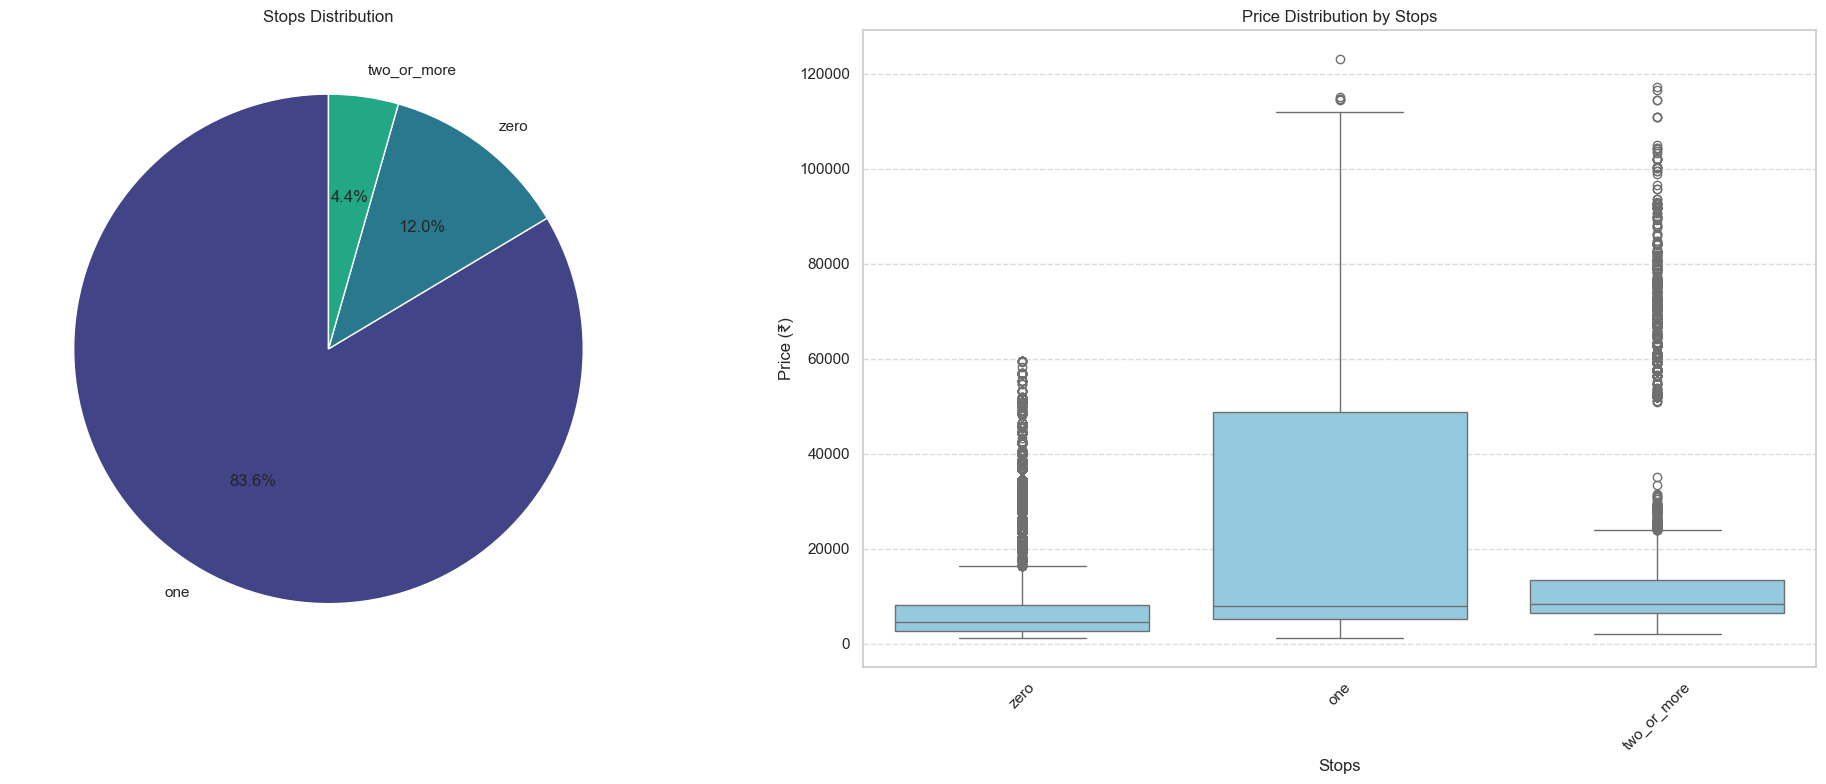

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a pie chart for stops analysis
axes[0].pie(data['stops'].value_counts(), labels=data['stops'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 4))
axes[0].set_title('Stops Distribution')

# Create a box plot
sns.boxplot(x='stops', y='price', data=data, ax=axes[1], color='skyblue')
axes[1].set_title('Price Distribution by Stops')
axes[1].set_xlabel('Stops')
axes[1].set_ylabel('Price (₹)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()